In [35]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime


In [195]:
# Load the dataset
df = pd.read_csv('../flight_final/economy_flight (5).csv')

print("Columns in the cleaned economy CSV:", df)

# Load the dataset
df2 = pd.read_csv('../flight_final/premium_economy_flight.csv')

print("Columns in the cleaned premium economy CSV:", df)

# Load the dataset
df3 = pd.read_csv('../flight_final/business_flight.csv')

print("Columns in the cleaned business CSV:", df)


# Load the dataset
df4 = pd.read_csv('../flight_final/firstclass_flight.csv')

print("Columns in the cleaned first class CSV:", df)

Columns in the cleaned economy CSV:                    Departure Airport Name Departure Airport ID  \
0            Yangon International Airport                  RGN   
1            Yangon International Airport                  RGN   
2            Yangon International Airport                  RGN   
3            Yangon International Airport                  RGN   
4            Yangon International Airport                  RGN   
...                                   ...                  ...   
47639  Ninoy Aquino International Airport                  MNL   
47640  Ninoy Aquino International Airport                  MNL   
47641  Ninoy Aquino International Airport                  MNL   
47642  Ninoy Aquino International Airport                  MNL   
47643  Ninoy Aquino International Airport                  MNL   

         Departure Time                    Arrival Airport Name  \
0      01/07/2024 17:25                    Suvarnabhumi Airport   
1       01/07/2024 7:45              

Columns in the cleaned business CSV:                    Departure Airport Name Departure Airport ID  \
0            Yangon International Airport                  RGN   
1            Yangon International Airport                  RGN   
2            Yangon International Airport                  RGN   
3            Yangon International Airport                  RGN   
4            Yangon International Airport                  RGN   
...                                   ...                  ...   
47639  Ninoy Aquino International Airport                  MNL   
47640  Ninoy Aquino International Airport                  MNL   
47641  Ninoy Aquino International Airport                  MNL   
47642  Ninoy Aquino International Airport                  MNL   
47643  Ninoy Aquino International Airport                  MNL   

         Departure Time                    Arrival Airport Name  \
0      01/07/2024 17:25                    Suvarnabhumi Airport   
1       01/07/2024 7:45             

In [5]:
pip install geopy


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Users/sandrachoo/myenv1/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [196]:
import numpy as np
from geopy.distance import geodesic

airport_coords = {
    'RGN': (16.9047, 96.1316),
    'BKK': (13.6923, 100.7507),
    'KUL': (2.7417, 101.7016),
    'SIN': (1.3586, 103.9899),
    'CGK': (6.1266, 106.6551),
    'SGN': (10.8158, 106.6641),
    'VTE': (17.9751, 102.5686),
    'MNL': (14.5123, 121.0165),
    'BWN': (4.9449, 114.9345),
    'PNH': (11.5525, 104.8450)
}

def calculate_distance(row):
    dep_coords = airport_coords[row['Departure Airport ID']]
    arr_coords = airport_coords[row['Final Arrival Airport ID']]
    return geodesic(dep_coords, arr_coords).kilometers

df['Airport Distance (km)'] = df.apply(calculate_distance, axis=1)
df2['Airport Distance (km)'] = df2.apply(calculate_distance, axis=1)
df3['Airport Distance (km)'] = df3.apply(calculate_distance, axis=1)
df4['Airport Distance (km)'] = df4.apply(calculate_distance, axis=1)

In [197]:
df['Flight Type'] = np.where(df['Layover 1 Duration'].isna(), 'Direct', 'Layover')
df2['Flight Type'] = np.where(df2['Layover 1 Duration'].isna(), 'Direct', 'Layover')
df3['Flight Type'] = np.where(df3['Layover 1 Duration'].isna(), 'Direct', 'Layover')
df4['Flight Type'] = np.where(df4['Layover 1 Duration'].isna(), 'Direct', 'Layover')


In [198]:
# Example airline star ratings
airline_star_ratings = {
    'Air China': 3,
    'AirAsia': 3,
    'AirAsia Cambodia': 3,
    'AirAsia X': 3,
    'Asiana': 5,
    'Bangkok Airways': 4,
    'Batik Air': 3,
    'Cambodia Airways': 2,
    'Cambodia Angkor Air': 3,
    'Cathay Pacific': 5,
    'Cebu Pacific': 3,
    'China Airlines': 4,
    'China Eastern': 3,
    'China Southern': 4,
    'Citilink Indonesia': 4,
    'Emirates': 5,
    'Ethiopian': 4,
    'EVA Air': 5,
    'Firefly': 3,
    'Garuda Indonesia': 5,
    'Greater Bay Airlines': 3,
    'Gulf Air': 4,
    'Hainan': 5,
    'Hong Kong Airlines': 4,
    'Hong Kong Express': 3,
    'Indonesia AirAsia': 3,
    'Jeju Air': 3,
    'Jetstar': 3,
    'KLM': 4,
    'Lao Airlines': 3,
    'MAI': 3,
    'Malaysia Airlines': 4,
    'Myanmar National Airlines': 3,
    'THAI': 4,
    'Singapore Airlines': 5,
    'Thai AirAsia': 3,
    'VietJet Air': 3,
    'Vietnam Airlines': 4,
    'Scoot': 3,
    'Vietjet': 3,
    'TransNusa': 2,
    'Thai Lion Air': 3,
    'Philippine Airlines': 4,
    'Philippines AirAsia': 3,
    'STARLUX': 5,
    'Royal Brunei': 4,
    'Thai Vietjet Air': 3,
    'Vietravel Airlines': 3,
    'STARLUX Airlines': 5,
    'Qatar Airways': 5,
    'Shenzhen': 3,
    'Sky Angkor': 2,
    'ANA': 5,
    'Shanghai Airlines': 3,
    'Qatar Airways': 5,
    'XiamenAir': 5
}

df['Airline Star Rating'] = df['Airline'].map(airline_star_ratings)
df2['Airline Star Rating'] = df2['Airline'].map(airline_star_ratings)
df3['Airline Star Rating'] = df3['Airline'].map(airline_star_ratings)
df4['Airline Star Rating'] = df4['Airline'].map(airline_star_ratings)



In [199]:

def get_time_of_day(time_str):
    time = datetime.strptime(time_str, '%d/%m/%Y %H:%M').time()
    if time < datetime.strptime('12:00', '%H:%M').time():
        return 'Morning'
    elif time < datetime.strptime('18:00', '%H:%M').time():
        return 'Afternoon'
    else:
        return 'Evening'

df['Time of Day'] = df['Departure Time'].apply(get_time_of_day)
df2['Time of Day'] = df2['Departure Time'].apply(get_time_of_day)
df3['Time of Day'] = df3['Departure Time'].apply(get_time_of_day)
df4['Time of Day'] = df4['Departure Time'].apply(get_time_of_day)


In [200]:
df.to_csv('../flight_final/economy_flight (5).csv', index=False)
df2.to_csv('../flight_final/premium_economy_flight.csv', index=False)
df3.to_csv('../flight_final/business_flight.csv', index=False)
df4.to_csv('../flight_final/firstclass_flight.csv', index=False)


In [201]:
# A Quick Information abou the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47644 entries, 0 to 47643
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Departure Airport Name           47644 non-null  object 
 1   Departure Airport ID             47644 non-null  object 
 2   Departure Time                   47644 non-null  object 
 3   Arrival Airport Name             47644 non-null  object 
 4   Arrival Airport ID               47644 non-null  object 
 5   Arrival Time                     47644 non-null  object 
 6   Duration                         47644 non-null  int64  
 7   Airline                          47644 non-null  object 
 8   Travel Class                     47644 non-null  object 
 9   Total Duration                   47644 non-null  int64  
 10  Layover 1 Duration               25324 non-null  float64
 11  Layover 1 Overnight              11083 non-null  object 
 12  Price             

In [202]:
# A Quick Information abou the Data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7932 entries, 0 to 7931
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Departure Airport Name          7932 non-null   object 
 1   Departure Airport ID            7932 non-null   object 
 2   Departure Time                  7932 non-null   object 
 3   Arrival Airport Name            7932 non-null   object 
 4   Arrival Airport ID              7932 non-null   object 
 5   Arrival Time                    7932 non-null   object 
 6   Duration                        7932 non-null   int64  
 7   Airline                         7932 non-null   object 
 8   Travel Class                    7932 non-null   object 
 9   Total Duration                  7932 non-null   int64  
 10  Layover 1 Duration              7932 non-null   float64
 11  Layover 1 Overnight             7932 non-null   object 
 12  Price                           79

In [203]:
# A Quick Information abou the Data
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38049 entries, 0 to 38048
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Departure Airport Name          38049 non-null  object 
 1   Departure Airport ID            38049 non-null  object 
 2   Departure Time                  38049 non-null  object 
 3   Arrival Airport Name            38049 non-null  object 
 4   Arrival Airport ID              38049 non-null  object 
 5   Arrival Time                    38049 non-null  object 
 6   Duration                        38049 non-null  int64  
 7   Airline                         38049 non-null  object 
 8   Travel Class                    38049 non-null  object 
 9   Total Duration                  38049 non-null  int64  
 10  Layover 1 Duration              38049 non-null  float64
 11  Layover 1 Overnight             38049 non-null  bool   
 12  Price                           

In [204]:
# A Quick Information abou the Data
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Departure Airport Name          1212 non-null   object 
 1   Departure Airport ID            1212 non-null   object 
 2   Departure Time                  1212 non-null   object 
 3   Arrival Airport Name            1212 non-null   object 
 4   Arrival Airport ID              1212 non-null   object 
 5   Arrival Time                    1212 non-null   object 
 6   Duration                        1212 non-null   int64  
 7   Airline                         1212 non-null   object 
 8   Travel Class                    1212 non-null   object 
 9   Total Duration                  1212 non-null   int64  
 10  Layover 1 Duration              1212 non-null   float64
 11  Layover 1 Overnight             1212 non-null   bool   
 12  Price                           12

In [205]:
def fill_missing_with_median(df, group_cols, target_col):
    # Step 1: Fill with group median
    median_values = df.groupby(group_cols)[target_col].median().reset_index()
    median_values = median_values.rename(columns={target_col: target_col + '_median'})
    df = df.merge(median_values, on=group_cols, how='left')
    df[target_col] = df[target_col].fillna(df[target_col + '_median'])
    
    # Step 2: Fill remaining with route-level median (ignoring airline)
    if df[target_col].isnull().any():
        print("Filling remaining missing values with route-level median (ignoring airline).")
        route_cols = ['Departure Airport ID', 'Final Arrival Airport ID']
        route_median_values = df.groupby(route_cols)[target_col].median().reset_index()
        route_median_values = route_median_values.rename(columns={target_col: target_col + '_route_median'})
        df = df.merge(route_median_values, on=route_cols, how='left')
        df[target_col] = df[target_col].fillna(df[target_col + '_route_median'])
        df.drop(columns=[target_col + '_route_median'], inplace=True)
    
    # Drop temporary median columns
    df.drop(columns=[target_col + '_median'], inplace=True)
    
    return df

# Apply the function to 'Price'
group_cols = ['Departure Airport ID', 'Final Arrival Airport ID', 'Airline']
df = fill_missing_with_median(df, group_cols, 'Price')
df2 = fill_missing_with_median(df2, group_cols, 'Price')
df3 = fill_missing_with_median(df3, group_cols, 'Price')
df4 = fill_missing_with_median(df4, group_cols, 'Price')


# # Apply the same logic to 'Duration' if needed
# df = fill_missing_with_median(df, group_cols, 'Duration')




Filling remaining missing values with route-level median (ignoring airline).


In [209]:
# check if there is any missing value in price 
has_missing_price = df4['Price'].isna().any()
if has_missing_price:
    print("There are still missing values in 'Price'.")
else:
    print("There are no missing values in 'Price'.")



There are no missing values in 'Price'.


In [216]:
# Set the pandas option to opt-in to the future behavior
pd.set_option('future.no_silent_downcasting', True)

# Replace 'Y' with True and 'N' with False in the entire DataFrame
df4.replace({'Y': True, 'N': False}, inplace=True)
df4

Departure Airport Name Departure Airport ID  \
0     Soekarno–Hatta International Airport                  CGK   
1     Soekarno–Hatta International Airport                  CGK   
2     Soekarno–Hatta International Airport                  CGK   
3     Soekarno–Hatta International Airport                  CGK   
4     Soekarno–Hatta International Airport                  CGK   
...                                    ...                  ...   
1207    Kuala Lumpur International Airport                  KUL   
1208    Kuala Lumpur International Airport                  KUL   
1209    Kuala Lumpur International Airport                  KUL   
1210    Kuala Lumpur International Airport                  KUL   
1211    Kuala Lumpur International Airport                  KUL   

        Departure Time      Arrival Airport Name Arrival Airport ID  \
0     01/07/2024 19:00  Singapore Changi Airport                SIN   
1      03/07/2024 7:55  Singapore Changi Airport                SIN   
2     04/07/2024 19:00  Singapore Changi Airport                SIN   
3      04/07/2024 7:55  Singapore Changi Airport                SIN   
4     05/07/2024 19:00  Singapore Changi Airport                SIN   
...                ...                       ...                ...   
1207  29/07/2024 21:20  Singapore Changi Airport                SIN   
1208   30/07/2024 8:50  Singapore Changi Airport                SIN   
1209  30/07/2024 21:20  Singapore Changi Airport                SIN   
1210   31/07/2024 8:50  Singapore Changi Airport                SIN   
1211  31/07/2024 21:20  Singapore Changi Airport                SIN   

          Arrival Time  Duration             Airline Travel Class  \
0     01/07/2024 21:50       110  Singapore Airlines  First Class   
1     03/07/2024 10:45       110  Singapore Airlines  First Class   
2     04/07/2024 21:50       110  Singapore Airlines  First Class   
3     04/07/2024 10:45       110  Singapore Airlines  First Class   
4     05/07/2024 21:50       110  Singapore Airlines  First Class   
...                ...       ...                 ...          ...   
1207  29/07/2024 22:30        70             Jetstar  First Class   
1208  30/07/2024 10:00        70             Jetstar  First Class   
1209  30/07/2024 22:30        70             Jetstar  First Class   
1210  31/07/2024 10:00        70             Jetstar  First Class   
1211  31/07/2024 22:30        70             Jetstar  First Class   

      Total Duration  ...  Overnight Flight  Departure Country Is Holiday  \
0                110  ...             False                         False   
1                110  ...             False                         False   
2                110  ...             False                         False   
3                110  ...             False                         False   
4                110  ...             False                         False   
...              ...  ...               ...                           ...   
1207            1215  ...             False                         False   
1208             525  ...             False                         False   
1209            1215  ...             False                         False   
1210             525  ...             False                         False   
1211            1215  ...             False                         False   

      Arrival Country Is Holiday        Final Arrival Airport Name  \
0                          False          Singapore Changi Airport   
1                          False          Singapore Changi Airport   
2                          False          Singapore Changi Airport   
3                          False          Singapore Changi Airport   
4                          False          Singapore Changi Airport   
...                          ...                               ...   
1207                       False  Phnom Penh International Airport   
1208                       False  Phnom Penh Int

In [221]:
# Check for any 'Y' values remaining
has_Y = (df == 'Y').any().any()
print(f"Any 'Y' remaining: {has_Y}")

# Check for any 'N' values remaining
has_N = (df == 'N').any().any()
print(f"Any 'N' remaining: {has_N}")


Any 'Y' remaining: False
Any 'N' remaining: False


In [161]:
# however there are still Y found in Cabin Baggage
# Focus on the 'Cabin Baggage' column specifically
df['Cabin Baggage'] = df['Cabin Baggage'].replace({'Y': True, 'N': False})



In [222]:
# Assuming df is your DataFrame
df['Layover 1 Duration'] = df['Layover 1 Duration'].fillna(0)
df2['Layover 1 Duration'] = df2['Layover 1 Duration'].fillna(0)
df3['Layover 1 Duration'] = df3['Layover 1 Duration'].fillna(0)
df4['Layover 1 Duration'] = df4['Layover 1 Duration'].fillna(0)


In [223]:
# Assuming df is your DataFrame
df['Layover 1 Overnight'] = df['Layover 1 Overnight'].fillna(False)
df2['Layover 1 Overnight'] = df2['Layover 1 Overnight'].fillna(False)
df3['Layover 1 Overnight'] = df3['Layover 1 Overnight'].fillna(False)
df4['Layover 1 Overnight'] = df4['Layover 1 Overnight'].fillna(False)


In [224]:
columns_with_nan = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_nan)
columns_with_nan = df2.columns[df2.isnull().any()].tolist()
print("Columns with missing values:", columns_with_nan)
columns_with_nan = df3.columns[df3.isnull().any()].tolist()
print("Columns with missing values:", columns_with_nan)
columns_with_nan = df4.columns[df4.isnull().any()].tolist()
print("Columns with missing values:", columns_with_nan)

Columns with missing values: []
Columns with missing values: []
Columns with missing values: []
Columns with missing values: []


In [191]:
#however there is still Y and N returns
# Identify rows that still contain 'Y' or 'N' values
import pandas as pd
# Sample data loading

# Remove leading and trailing spaces from column names
df4.columns = df4.columns.str.strip()

# List all column names to verify
print("Updated column names in the DataFrame:")
print(df.columns)

# Identify rows in the 'Cabin Baggage' column that still contain 'Y' or 'N'
if 'Cabin Baggage' in df.columns:
    rows_with_Y_or_N_cabin_baggage = df[df['Cabin Baggage'].isin(['Y', 'N'])]
    # Display the rows that contain 'Y' or 'N' in the 'Cabin Baggage' column
    print("Rows with 'Y' or 'N' in the 'Cabin Baggage' column after replacement:")
    print(rows_with_Y_or_N_cabin_baggage)
else:
    print("'Cabin Baggage' column not found in the DataFrame.")



Updated column names in the DataFrame:
Index(['Departure Airport Name', 'Departure Airport ID', 'Departure Time',
       'Arrival Airport Name', 'Arrival Airport ID', 'Arrival Time',
       'Duration', 'Airline', 'Travel Class', 'Total Duration',
       'Layover 1 Duration', 'Layover 1 Overnight', 'Price', 'Cabin Baggage',
       'Checked Baggage', 'Meal Included', 'Cabin Baggage (Number)',
       'Cabin Baggage (kg per piece)', 'Checked Baggage (Number)',
       'Checked Baggage (kg per piece)', 'Day of Week (on flight date)',
       'Overnight Flight', 'Departure Country Is Holiday',
       'Arrival Country Is Holiday', 'Final Arrival Airport Name',
       'Final Arrival Airport ID', 'Airport Distance (km)',
       'Airline Star Rating', 'Time of Day', 'Flight Type',
       'Total_Baggage_kg'],
      dtype='object')
Rows with 'Y' or 'N' in the 'Cabin Baggage' column after replacement:
Empty DataFrame
Columns: [Departure Airport Name, Departure Airport ID, Departure Time, Arrival Airp

In [227]:
def calculate_total_baggage_weight(df):
    # Calculate total cabin baggage weight
    df['Total_Cabin_Baggage_kg'] = df['Cabin Baggage (Number)'] * df['Cabin Baggage (kg per piece)']

    # Calculate total checked baggage weight
    df['Total_Checked_Baggage_kg'] = df['Checked Baggage (Number)'] * df['Checked Baggage (kg per piece)']

    # Sum both to get the total baggage weight
    df['Total_Baggage_kg'] = df['Total_Cabin_Baggage_kg'] + df['Total_Checked_Baggage_kg']

    # Drop intermediate columns if you no longer need them
    df.drop(columns=['Total_Cabin_Baggage_kg', 'Total_Checked_Baggage_kg'], inplace=True)

    # Return the modified DataFrame
    return df

# Apply the function to each DataFrame
df = calculate_total_baggage_weight(df)
df2 = calculate_total_baggage_weight(df2)
df3 = calculate_total_baggage_weight(df3)
df4 = calculate_total_baggage_weight(df4)


In [228]:
df.to_csv('../flight_final/economy_flight (5).csv', index=False)
df2.to_csv('../flight_final/premium_economy_flight.csv', index=False)
df3.to_csv('../flight_final/business_flight.csv', index=False)
df4.to_csv('../flight_final/firstclass_flight.csv', index=False)

In [229]:
# Concatenate all the DataFrames
df_combined = pd.concat([df, df2, df3, df4], ignore_index=True)
# Save the combined DataFrame to a new CSV file
df_combined.to_csv('../flight_final/final_flight_data.csv', index=False)


In [240]:
df_combined = pd.read_csv('../flight_final/final_flight_data.csv')

print("Columns in the cleaned economy CSV:", df_combined)

Columns in the cleaned economy CSV:                    Departure Airport Name Departure Airport ID  \
0            Yangon International Airport                  RGN   
1            Yangon International Airport                  RGN   
2            Yangon International Airport                  RGN   
3            Yangon International Airport                  RGN   
4            Yangon International Airport                  RGN   
...                                   ...                  ...   
94832  Kuala Lumpur International Airport                  KUL   
94833  Kuala Lumpur International Airport                  KUL   
94834  Kuala Lumpur International Airport                  KUL   
94835  Kuala Lumpur International Airport                  KUL   
94836  Kuala Lumpur International Airport                  KUL   

         Departure Time                Arrival Airport Name  \
0      01/07/2024 17:25                Suvarnabhumi Airport   
1       01/07/2024 7:45                Suvarn

In [241]:
# Find rows with missing values
rows_with_missing_values = df_combined[df_combined.isnull().any(axis=1)]

# Print the total number of rows with missing values
print(f'Total number of rows with missing values: {rows_with_missing_values.shape[0]}')

# Create a DataFrame to show missing columns per row
missing_info = rows_with_missing_values.isnull()

# Display the specific features with missing values for each row
for index, row in rows_with_missing_values.iterrows():
    missing_columns = missing_info.columns[missing_info.loc[index]].tolist()
    print(f'Row index {index} has missing values in columns: {missing_columns}')

Total number of rows with missing values: 0


In [242]:
# Function to split datetime into date and time in specific formats
def split_datetime(df, column):
    # Convert the column to datetime
    df[column] = pd.to_datetime(df[column], dayfirst=True, errors='coerce')
    
    # Create new columns for date and time in the desired format
    df[column + '_Date'] = df[column].dt.strftime('%Y%m%d').astype(int)
    df[column + '_Time'] = df[column].dt.strftime('%H%M').astype(int)
    
    # Drop the original datetime column
    df.drop(column, axis=1, inplace=True)

# Apply the split_datetime function to 'Departure Time' and 'Arrival Time'
split_datetime(df_combined, 'Departure Time')
split_datetime(df_combined, 'Arrival Time')

# Display the updated DataFrame with the new columns
print(df_combined.head())

# Save the updated DataFrame to a new CSV file
output_file_path = 'final_flight_data.csv'  # Replace with your desired output file path
df_combined.to_csv(output_file_path, index=False)

print(f"Updated data saved to {output_file_path}")


         Departure Airport Name Departure Airport ID  \
0  Yangon International Airport                  RGN   
1  Yangon International Airport                  RGN   
2  Yangon International Airport                  RGN   
3  Yangon International Airport                  RGN   
4  Yangon International Airport                  RGN   

                 Arrival Airport Name Arrival Airport ID  Duration  \
0                Suvarnabhumi Airport                BKK        85   
1                Suvarnabhumi Airport                BKK        85   
2                Suvarnabhumi Airport                BKK        90   
3                Suvarnabhumi Airport                BKK        90   
4  Kuala Lumpur International Airport                KUL       175   

                     Airline Travel Class  Total Duration  Layover 1 Duration  \
0  Myanmar National Airlines      Economy              85                   0   
1  Myanmar National Airlines      Economy              85                   0   

In [236]:
df_combined

Departure Airport Name Departure Airport ID  \
0            Yangon International Airport                  RGN   
1            Yangon International Airport                  RGN   
2            Yangon International Airport                  RGN   
3            Yangon International Airport                  RGN   
4            Yangon International Airport                  RGN   
...                                   ...                  ...   
94832  Kuala Lumpur International Airport                  KUL   
94833  Kuala Lumpur International Airport                  KUL   
94834  Kuala Lumpur International Airport                  KUL   
94835  Kuala Lumpur International Airport                  KUL   
94836  Kuala Lumpur International Airport                  KUL   

                     Arrival Airport Name Arrival Airport ID  Duration  \
0                    Suvarnabhumi Airport                BKK        85   
1                    Suvarnabhumi Airport                BKK        85   
2                    Suvarnabhumi Airport                BKK        90   
3                    Suvarnabhumi Airport                BKK        90   
4      Kuala Lumpur International Airport                KUL       175   
...                                   ...                ...       ...   
94832            Singapore Changi Airport                SIN        70   
94833            Singapore Changi Airport                SIN        70   
94834            Singapore Changi Airport                SIN        70   
94835            Singapore Changi Airport                SIN        70   
94836            Singapore Changi Airport                SIN        70   

       Total Duration  Layover 1 Duration  Layover 1 Overnight   Price  \
0                  85                   0                False    93.0   
1                  85                   0                False   113.0   
2                  90                   0                False   138.0   
3                  90                   0                False   138.0   
4                 670                 355                False   161.0   
...               ...                 ...                  ...     ...   
94832            1215                1025                 True  2199.0   
94833             525                 335                False  2199.0   
94834            1215                1025                 True  2199.0   
94835             525                 335                False  2199.0   
94836            1215                1025                 True  2199.0   

       Cabin Baggage  ...  Flight Type_Layover  Airline Star Rating_3  \
0               True  ...                False                   True   
1               True  ...                False                   True   
2               True  ...                False                  False   
3               True  ...                False                  False   
4               True  ...                 True                  False   
...              ...  ...                  ...                    ...   
94832           True  ...                 True                   True   
94833           True  ...                 True                   True   
94834           True  ...                 True                   True   
94835           True  ...                 True                   True   
94836           True  ...                 True                   True   

       Airline Star Rating_4  Airline Star Rating_5  Time of Day_Evening  \
0                      False                  False                False   
1                      False                  False                False   
2                       True                  False                False   
3                       True                  False                 True   
4                       True                  False                False   
...                      ...                    ...                  ...   
94832                  False           

In [238]:
# A Quick Information abou the Data
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94837 entries, 0 to 94836
Columns: 105 entries, Departure Airport Name to Arrival Time_Time
dtypes: bool(86), float64(2), int64(12), object(5)
memory usage: 21.5+ MB


# Data Visualisation

In [1]:
# Identify the numbers of airlines in each class

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'final_flight_data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Define the correct travel classes based on the dataset
travel_classes = ['Economy', 'Premium Economy', 'Business Class', 'First Class']

# Create subplots for each travel class
fig, axes = plt.subplots(4, 1, figsize=(84, 78))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set the style to match the example provided
sns.set(style="whitegrid")

for i, travel_class in enumerate(travel_classes):
    # Filter the dataframe for the current travel class
    class_data = df[df['Travel Class'] == travel_class]
    
    # Create a countplot for the current travel class using seaborn
    sns.countplot(x='Airline', data=class_data, ax=axes[i], palette="Set3")
    
    # Customize the plot
    axes[i].set_title(f'Airline Count in {travel_class}', fontsize=50) 
    axes[i].set_xlabel('Airline', fontsize=45) 
    axes[i].set_ylabel('Count', fontsize=45)  
    axes[i].tick_params(axis='x', rotation=90, labelsize=40)  # Rotate x-axis labels to avoid overlap
    axes[i].tick_params(axis='y', labelsize=40) 

# Adjust layout to give more space between plots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter for more spacing

# Add a main title for all subplots
plt.suptitle('Airline Count by Travel Class', fontsize=60)

# Display the plot
plt.show()


/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/3408215149.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Airline', data=class_data, ax=axes[i], palette="Set3")
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/3408215149.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Airline', data=class_data, ax=axes[i], palette="Set3")
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/3408215149.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Airline', data=class_data, ax=axes[

In [6]:
# Identify the the fare of flight by the departure airport to each arrival airport in ASEAN countries

# Load the dataset
file_path = 'final_flight_data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Define the correct travel classes based on the dataset
travel_classes = ['Economy', 'Premium Economy', 'Business Class', 'First Class']

# Create subplots for each travel class
fig, axes = plt.subplots(4, 1, figsize=(84, 78))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set the style to match the example provided
sns.set(style="whitegrid")

for i, travel_class in enumerate(travel_classes):
    # Filter the dataframe for the current travel class
    class_data = df[df['Travel Class'] == travel_class]
    
    # Create a boxplot for the current travel class using seaborn
    sns.boxplot(x='Departure Airport ID', y='Price', data=class_data, ax=axes[i], palette="Set3", dodge=False)
    
    # Customize the plot
    axes[i].set_title(f'Price Range by Departure Airport - {travel_class}', fontsize=50) 
    axes[i].set_xlabel('Departure Airport', fontsize=45) 
    axes[i].set_ylabel('Fare', fontsize=45)  
    axes[i].tick_params(axis='x', rotation=45, labelsize=40) 
    axes[i].tick_params(axis='y', labelsize=40) 

# Adjust layout to give more space between plots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter for more spacing

# Add a main title for all subplots
plt.suptitle('Price Range by Departure Airport and Travel Class', fontsize=18)

# Display the plot
plt.show()

/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/3146080504.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Departure Airport ID', y='Price', data=class_data, ax=axes[i], palette="Set3", dodge=False)
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/3146080504.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Departure Airport ID', y='Price', data=class_data, ax=axes[i], palette="Set3", dodge=False)
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/3146080504.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

In [265]:
# Identify the the fare of flight by the airlines in each class

# Load the dataset
file_path = 'final_flight_data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Define the correct travel classes based on the dataset
travel_classes = ['Economy', 'Premium Economy', 'Business Class', 'First Class']

# Create subplots for each travel class
fig, axes = plt.subplots(4, 1, figsize=(84, 78))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set the style to match the example provided
sns.set(style="whitegrid")

for i, travel_class in enumerate(travel_classes):
    # Filter the dataframe for the current travel class
    class_data = df[df['Travel Class'] == travel_class]
    
    # Create a boxplot for the current travel class using seaborn
    sns.boxplot(x='Airline', y='Price', data=class_data, ax=axes[i], palette="Set3", dodge=False)
    
    # Customize the plot
    axes[i].set_title(f'Price Range by Airline - {travel_class}', fontsize=50) 
    axes[i].set_xlabel('Airline', fontsize=45) 
    axes[i].set_ylabel('Fare', fontsize=45)  
    axes[i].tick_params(axis='x', rotation=45, labelsize=40) 
    axes[i].tick_params(axis='y', labelsize=40) 

# Adjust layout to give more space between plots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter for more spacing

# Add a main title for all subplots
plt.suptitle('Price Range by Airline and Travel Class', fontsize=18)

# Display the plot
plt.show()



/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_26734/40002228.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='Price', data=class_data, ax=axes[i], palette="Set3", dodge=False)
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_26734/40002228.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='Price', data=class_data, ax=axes[i], palette="Set3", dodge=False)
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_26734/40002228.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=

/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/1312905615.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Time of Day', y='Price', data=class_data, ax=axes[i], palette="Set3", order=['Morning', 'Afternoon', 'Evening'], markers='o', linestyles='-')
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/1312905615.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Time of Day', y='Price', data=class_data, ax=axes[i], palette="Set3", order=['Morning', 'Afternoon', 'Evening'], markers='o', linestyles='-')
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/1312905615.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is d

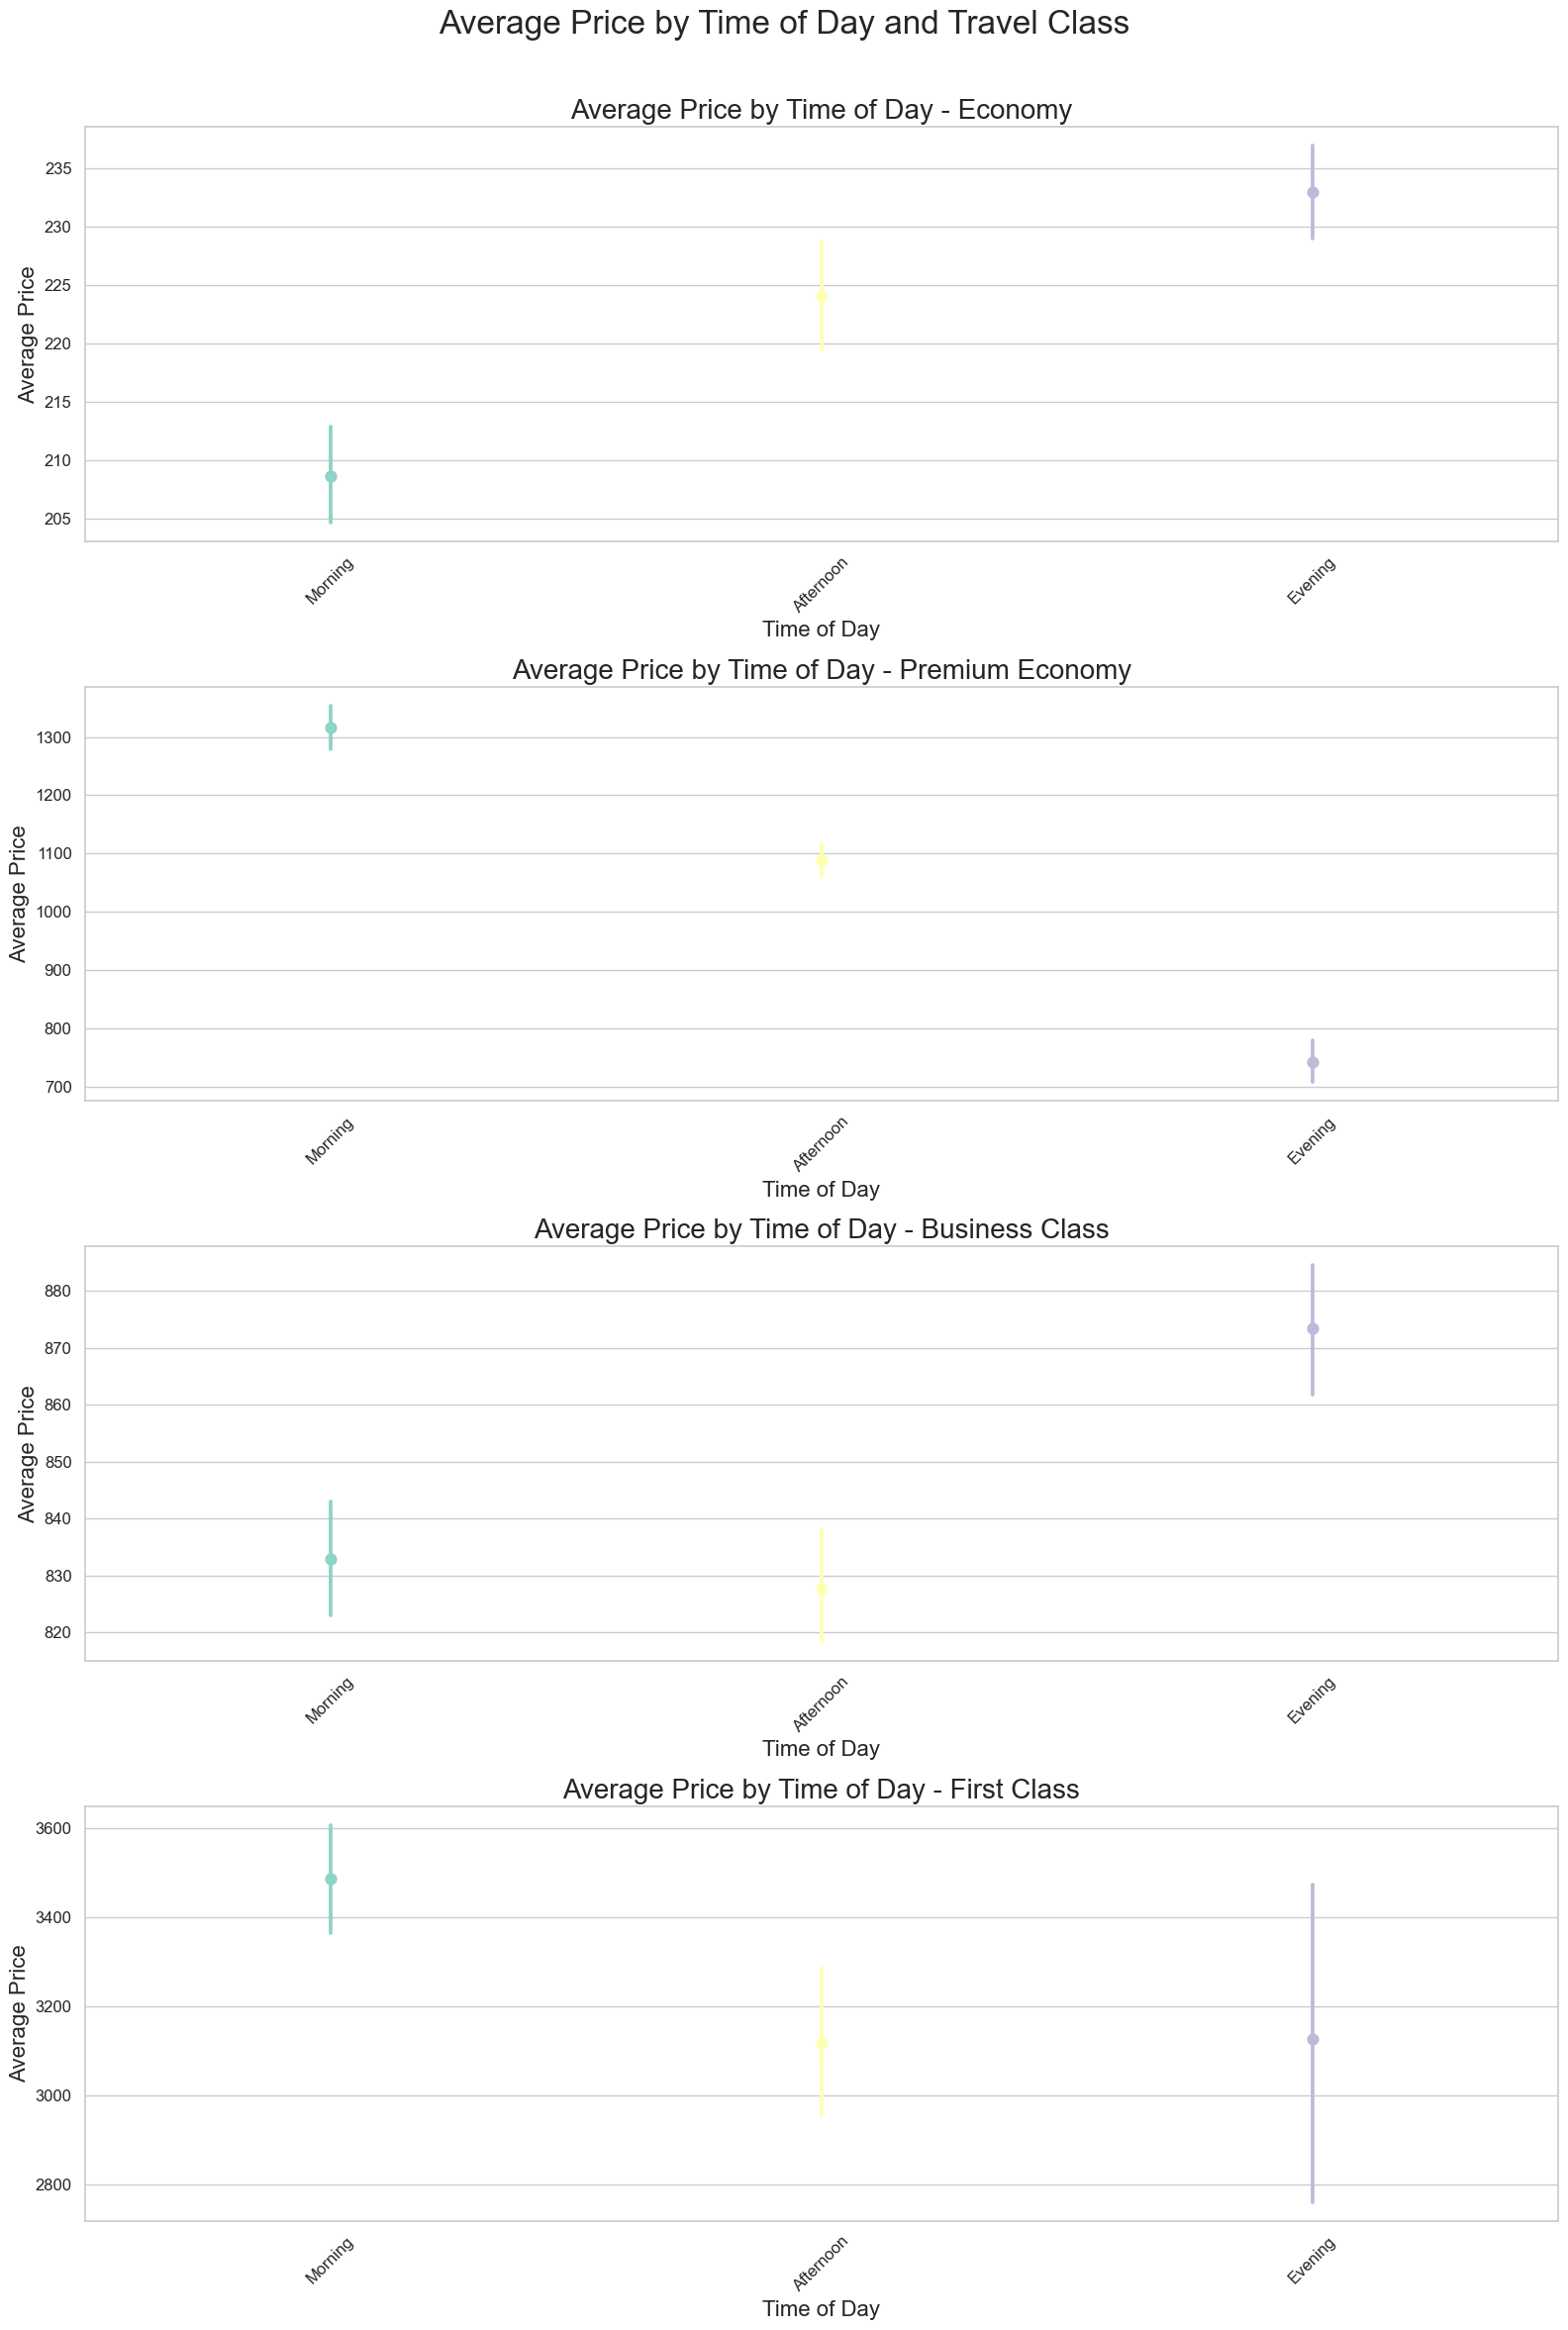

In [18]:
# Time of Day (Morning, Afternoon, Evening) vs Price 
# Load the dataset
file_path = 'final_flight_data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Define the correct travel classes based on the dataset
travel_classes = ['Economy', 'Premium Economy', 'Business Class', 'First Class']

# Create subplots for each travel class
fig, axes = plt.subplots(4, 1, figsize=(16, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set the style to match the example provided
sns.set(style="whitegrid")

for i, travel_class in enumerate(travel_classes):
    # Filter the dataframe for the current travel class
    class_data = df[df['Travel Class'] == travel_class]
    
    # Create a point plot for the current travel class using seaborn
    sns.pointplot(x='Time of Day', y='Price', data=class_data, ax=axes[i], palette="Set3", order=['Morning', 'Afternoon', 'Evening'], markers='o', linestyles='-')
    
    # Customize the plot
    axes[i].set_title(f'Average Price by Time of Day - {travel_class}', fontsize=20) 
    axes[i].set_xlabel('Time of Day', fontsize=16) 
    axes[i].set_ylabel('Average Price', fontsize=16)  
    axes[i].tick_params(axis='x', rotation=45, labelsize=12) 
    axes[i].tick_params(axis='y', labelsize=12) 

# Adjust layout to give more space between plots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a main title for all subplots
plt.suptitle('Average Price by Time of Day and Travel Class', fontsize=24)

# Display the plot
plt.show()



/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/1471230790.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dep_Hour', y='Price', data=class_data, ax=axes[i], palette="Set3")
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/1471230790.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dep_Hour', y='Price', data=class_data, ax=axes[i], palette="Set3")
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/1471230790.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dep_Hour', y='Pri

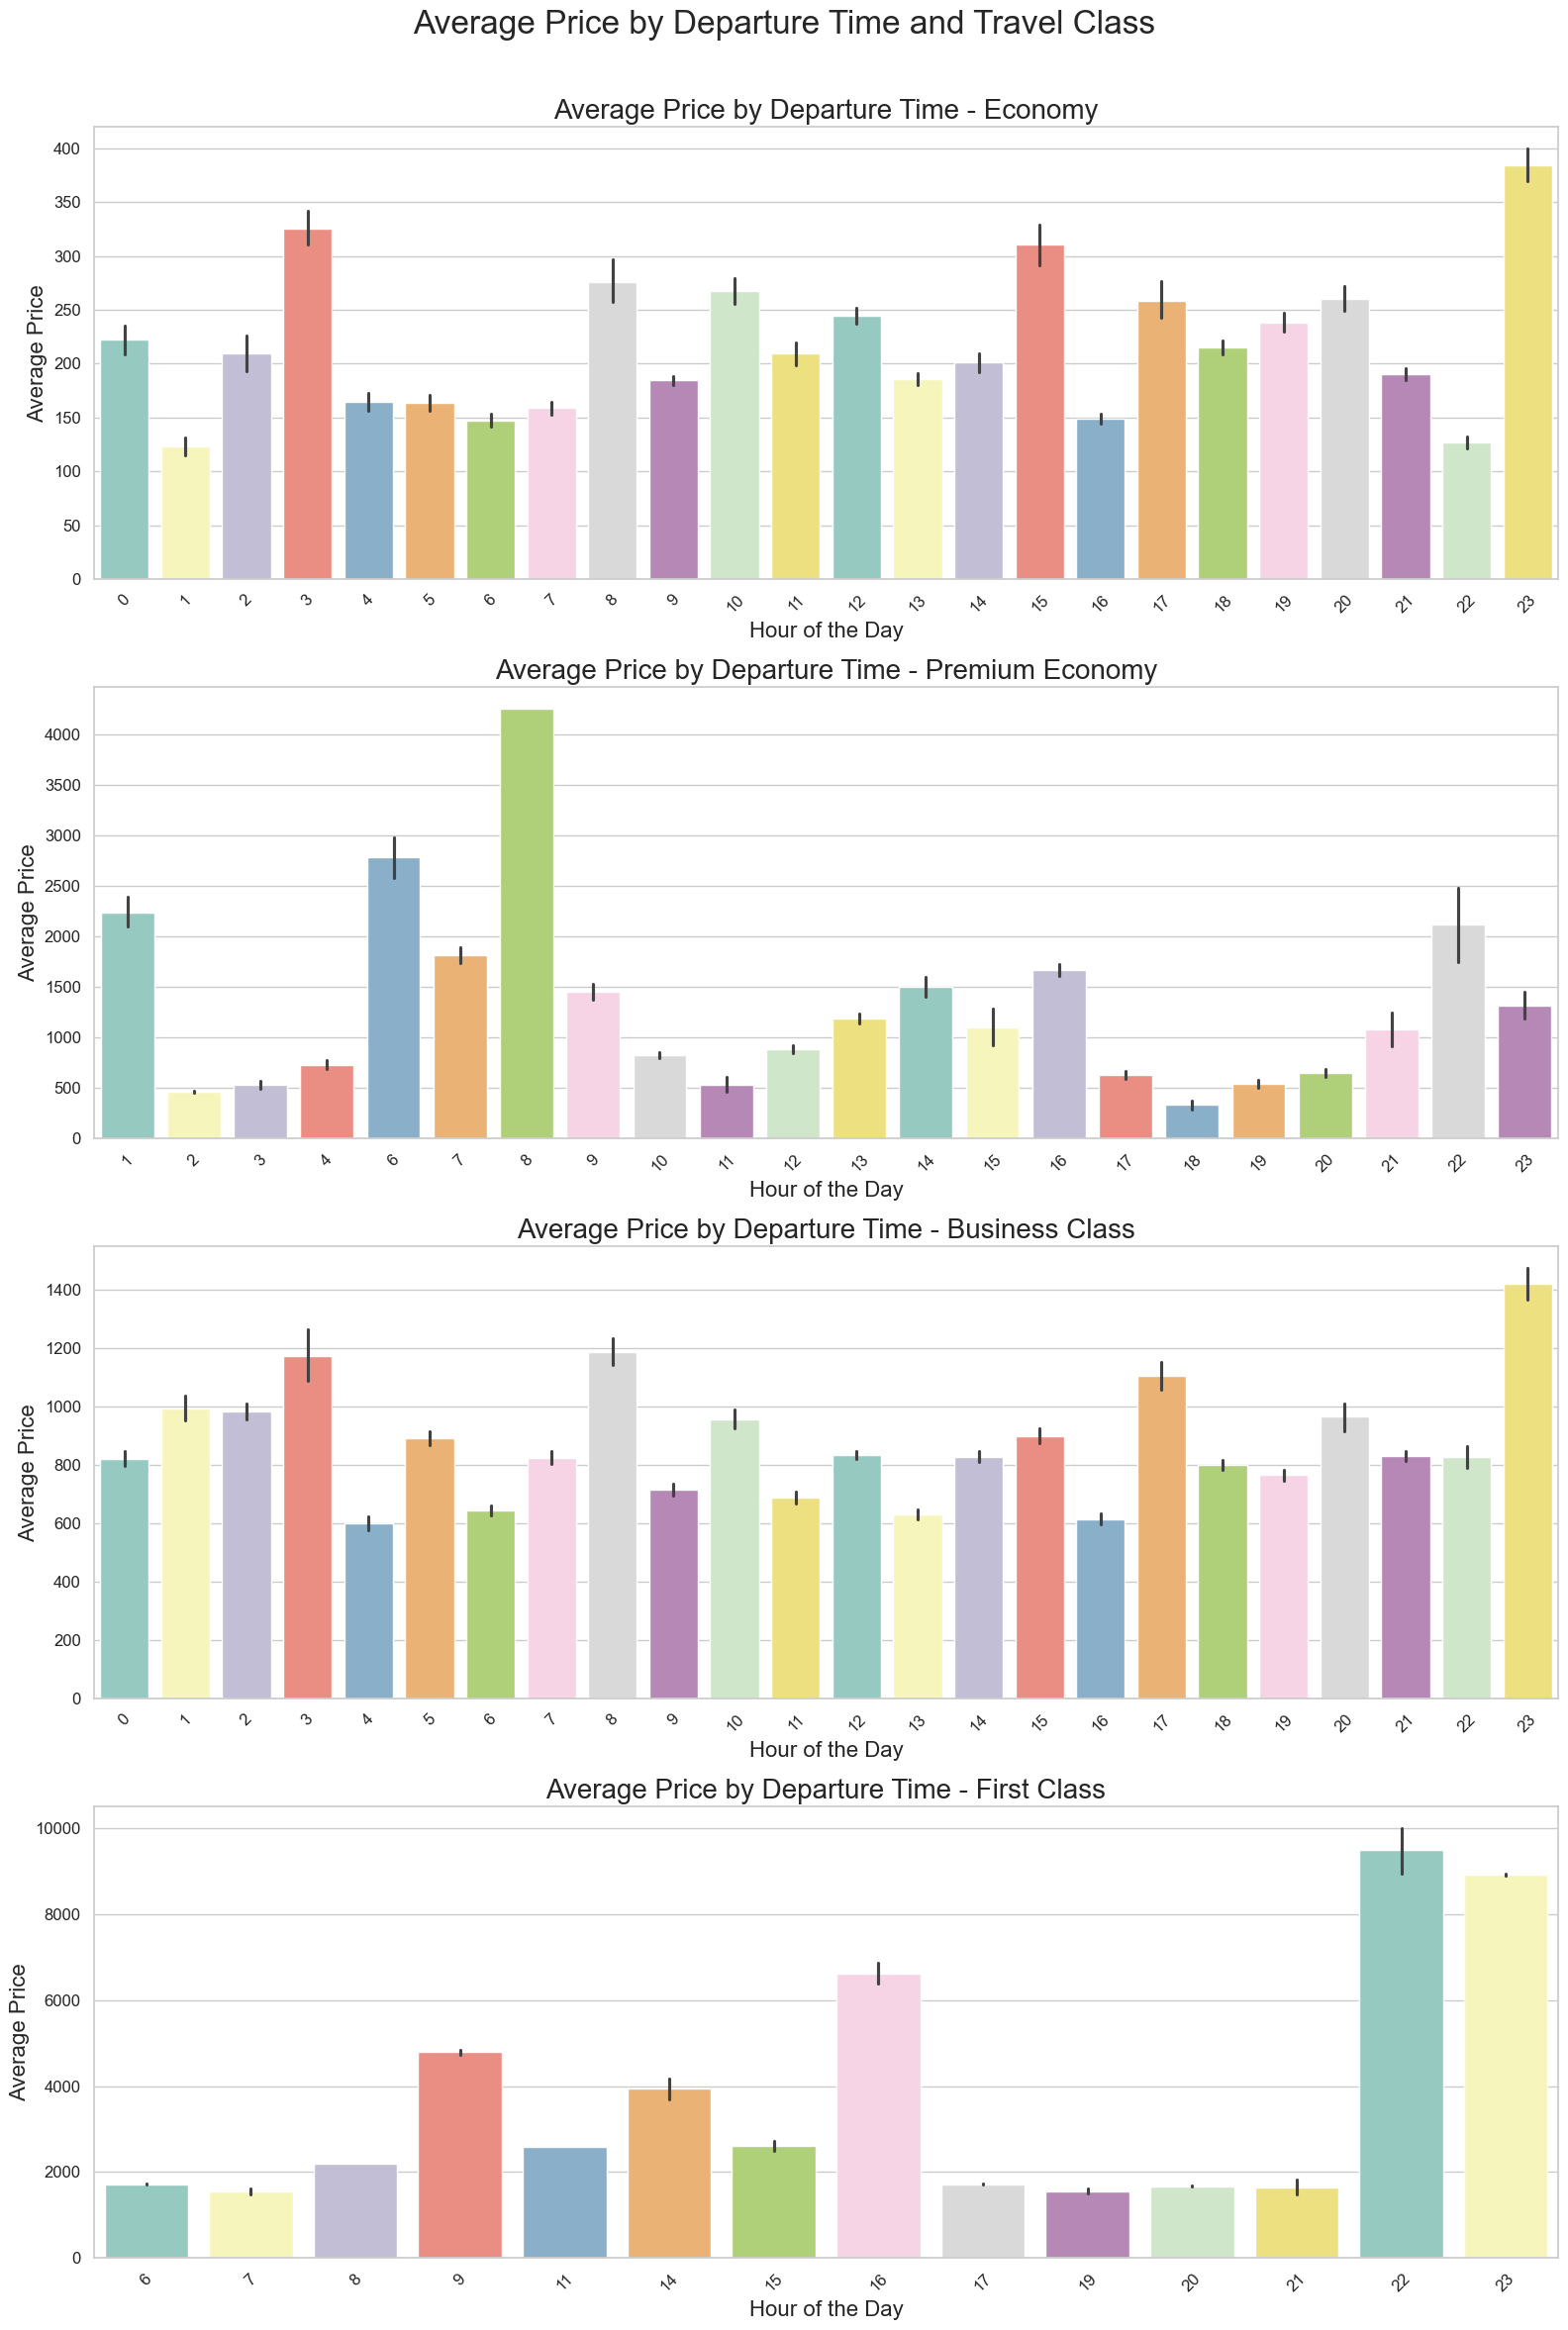

In [10]:
#Time (24 hours) vs Price

# Load the dataset
file_path = 'final_flight_data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Convert 'Departure Time_Time' to a string and pad with zeros if necessary
df['Departure Time_Time'] = df['Departure Time_Time'].astype(str).str.zfill(4)

# Extract the hour from 'Departure Time_Time'
df['Dep_Hour'] = df['Departure Time_Time'].str[:2].astype(int)

# Define the correct travel classes based on the dataset
travel_classes = ['Economy', 'Premium Economy', 'Business Class', 'First Class']

# Create subplots for each travel class
fig, axes = plt.subplots(4, 1, figsize=(16, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set the style for the plots
sns.set(style="whitegrid")

for i, travel_class in enumerate(travel_classes):
    # Filter the dataframe for the current travel class
    class_data = df[df['Travel Class'] == travel_class]
    
    # Create a bar plot for the current travel class using seaborn
    sns.barplot(x='Dep_Hour', y='Price', data=class_data, ax=axes[i], palette="Set3")
    
    # Customize the plot
    axes[i].set_title(f'Average Price by Departure Time - {travel_class}', fontsize=20) 
    axes[i].set_xlabel('Hour of the Day', fontsize=16) 
    axes[i].set_ylabel('Average Price', fontsize=16)  
    axes[i].tick_params(axis='x', rotation=45, labelsize=12) 
    axes[i].tick_params(axis='y', labelsize=12) 

# Adjust layout to give more space between plots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a main title for all subplots
plt.suptitle('Average Price by Departure Time and Travel Class', fontsize=24)

# Display the plot
plt.show()


/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/755689705.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Day of Week (on flight date)', y='Price', data=class_data, ax=axes[i], palette="Set3", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], markers='o', linestyles='-')
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/755689705.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Day of Week (on flight date)', y='Price', data=class_data, ax=axes[i], palette="Set3", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], markers='o', linestyles='-')
/var/folders/pn/vsml0m511vvb

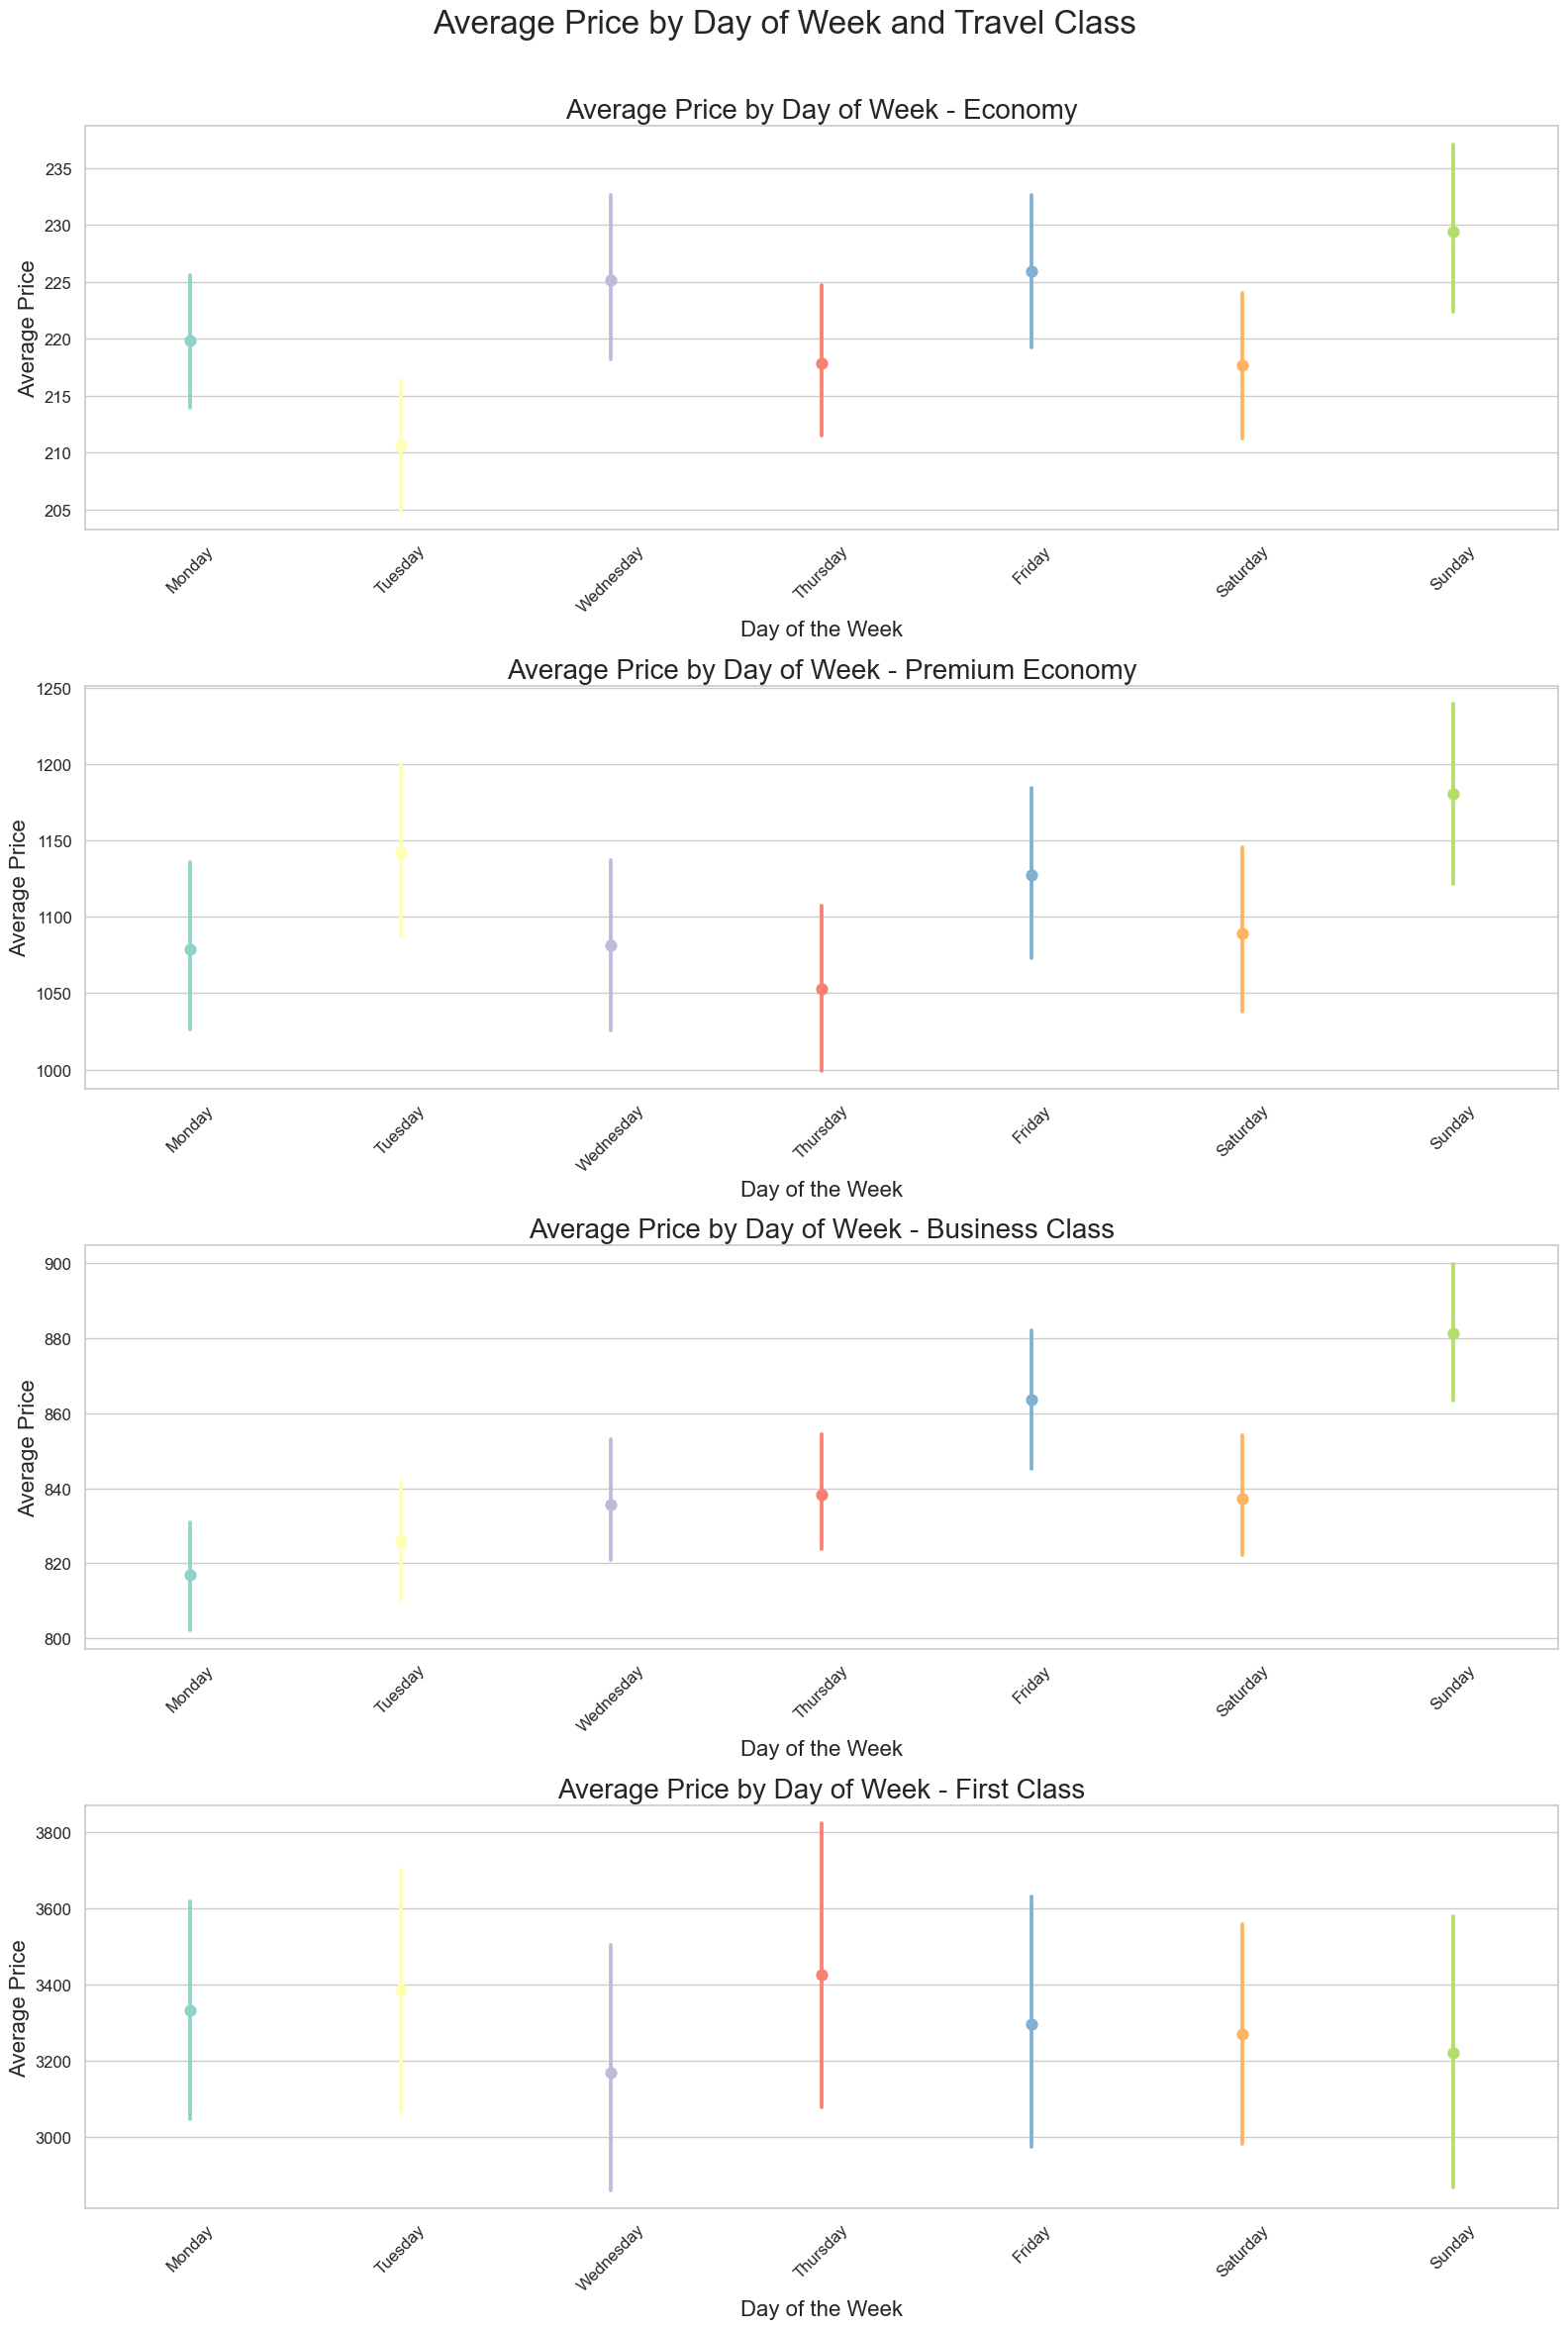

In [5]:
#Day of week (Monday to Sunday) vs Price

# Load the dataset
file_path = 'final_flight_data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Define the correct travel classes based on the dataset
travel_classes = ['Economy', 'Premium Economy', 'Business Class', 'First Class']

# Create subplots for each travel class
fig, axes = plt.subplots(4, 1, figsize=(16, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set the style to match the example provided
sns.set(style="whitegrid")

for i, travel_class in enumerate(travel_classes):
    # Filter the dataframe for the current travel class
    class_data = df[df['Travel Class'] == travel_class]
    
    # Create a point plot for the current travel class using seaborn
    sns.pointplot(x='Day of Week (on flight date)', y='Price', data=class_data, ax=axes[i], palette="Set3", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], markers='o', linestyles='-')
    
    # Customize the plot
    axes[i].set_title(f'Average Price by Day of Week - {travel_class}', fontsize=20) 
    axes[i].set_xlabel('Day of the Week', fontsize=16) 
    axes[i].set_ylabel('Average Price', fontsize=16)  
    axes[i].tick_params(axis='x', rotation=45, labelsize=12) 
    axes[i].tick_params(axis='y', labelsize=12) 

# Adjust layout to give more space between plots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a main title for all subplots
plt.suptitle('Average Price by Day of Week and Travel Class', fontsize=24)

# Display the plot
plt.show()



/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/3044674249.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data['Month'] = class_data['Month'].map(month_labels)
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/3044674249.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Price', data=class_data, ax=axes[i], palette="Set3")
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/3044674249.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

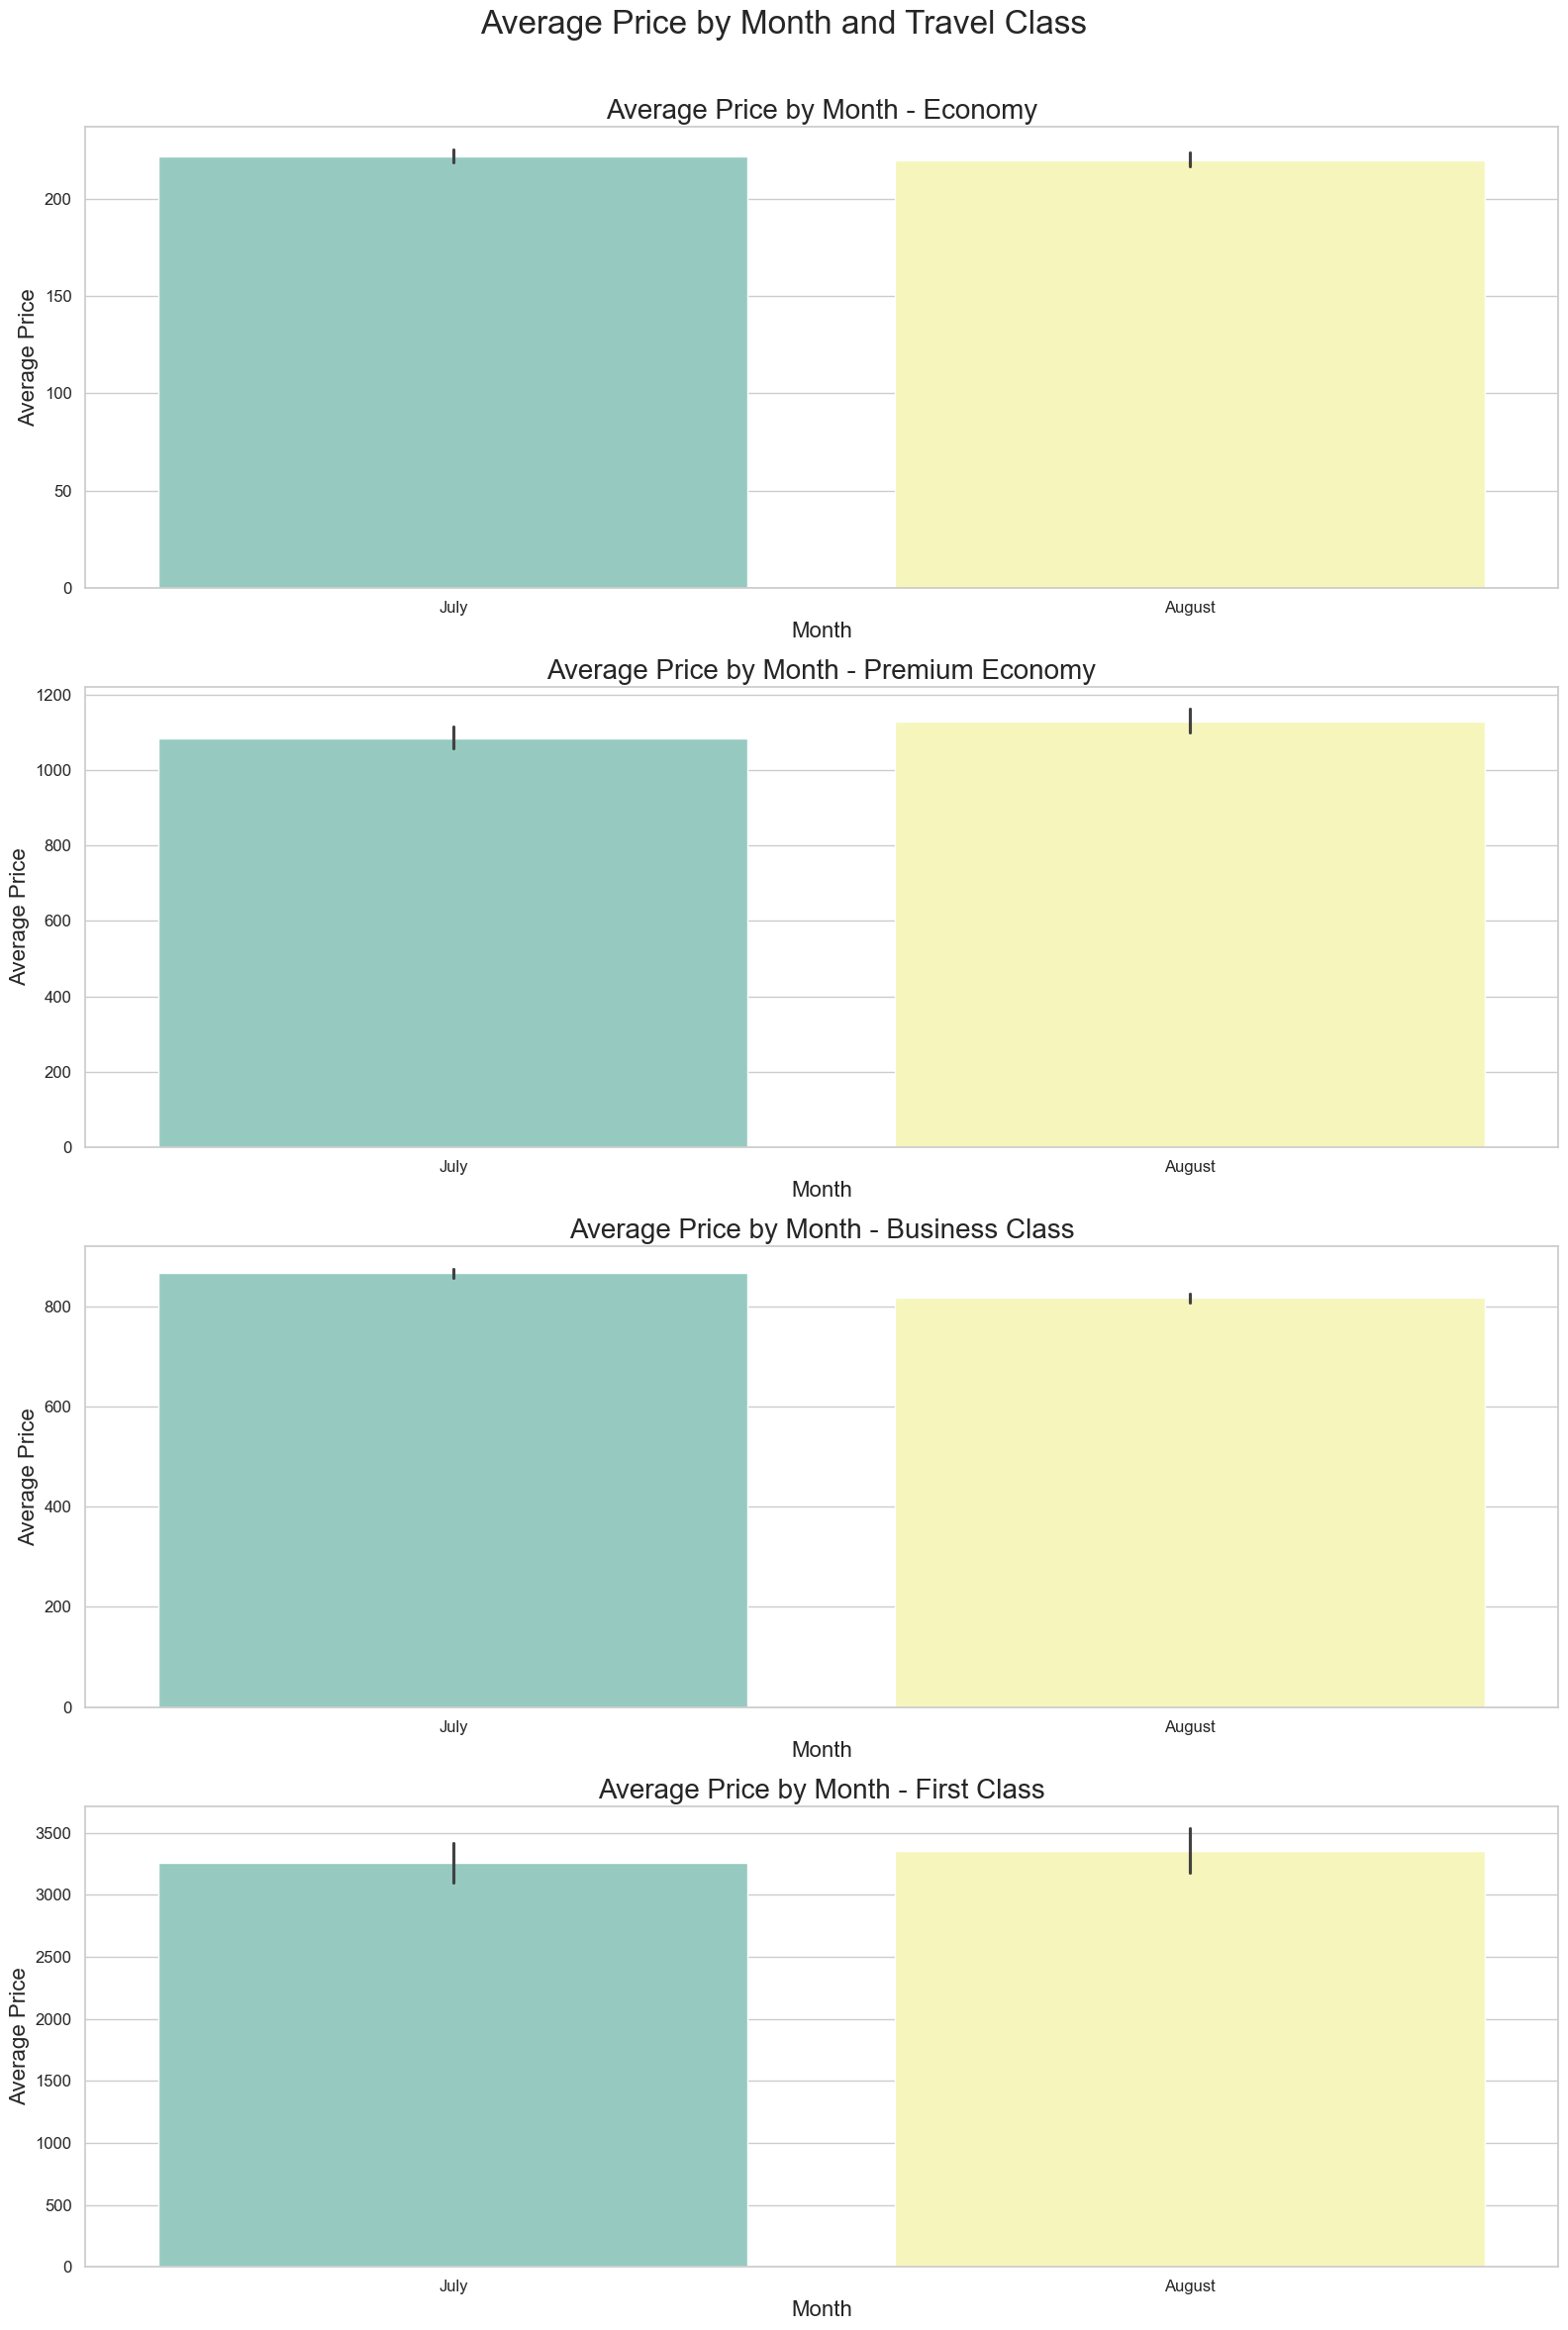

In [13]:
#Month (July and August) vs Price

# Load the dataset
file_path = 'final_flight_data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Convert 'Departure Time_Date' to a string to extract the month
df['Departure Time_Date'] = df['Departure Time_Date'].astype(str)

# Extract the month from 'Departure Time_Date'
df['Month'] = df['Departure Time_Date'].str[4:6].astype(int)

# Define the correct travel classes based on the dataset
travel_classes = ['Economy', 'Premium Economy', 'Business Class', 'First Class']

# Create subplots for each travel class
fig, axes = plt.subplots(4, 1, figsize=(16, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set the style for the plots
sns.set(style="whitegrid")

# Month labels
month_labels = {7: 'July', 8: 'August'}

for i, travel_class in enumerate(travel_classes):
    # Filter the dataframe for the current travel class
    class_data = df[df['Travel Class'] == travel_class]
    
    # Map the month numbers to month names for better readability
    class_data['Month'] = class_data['Month'].map(month_labels)
    
    # Create a bar plot for the current travel class using seaborn
    sns.barplot(x='Month', y='Price', data=class_data, ax=axes[i], palette="Set3")
    
    # Customize the plot
    axes[i].set_title(f'Average Price by Month - {travel_class}', fontsize=20) 
    axes[i].set_xlabel('Month', fontsize=16) 
    axes[i].set_ylabel('Average Price', fontsize=16)  
    axes[i].tick_params(axis='x', labelsize=12) 
    axes[i].tick_params(axis='y', labelsize=12) 

# Adjust layout to give more space between plots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a main title for all subplots
plt.suptitle('Average Price by Month and Travel Class', fontsize=24)

# Display the plot
plt.show()


/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/2537461673.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=class_data['Total Duration'], y=class_data['Price'], ax=axes[i], palette='Set2')
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/2537461673.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=class_data['Total Duration'], y=class_data['Price'], ax=axes[i], palette='Set2')
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/2537461673.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=class_data['Total Duration'], y=class_data['Price'], ax=axes[i], palette='Set2')
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/2537461673.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=class_data['Total Duration'], y=class

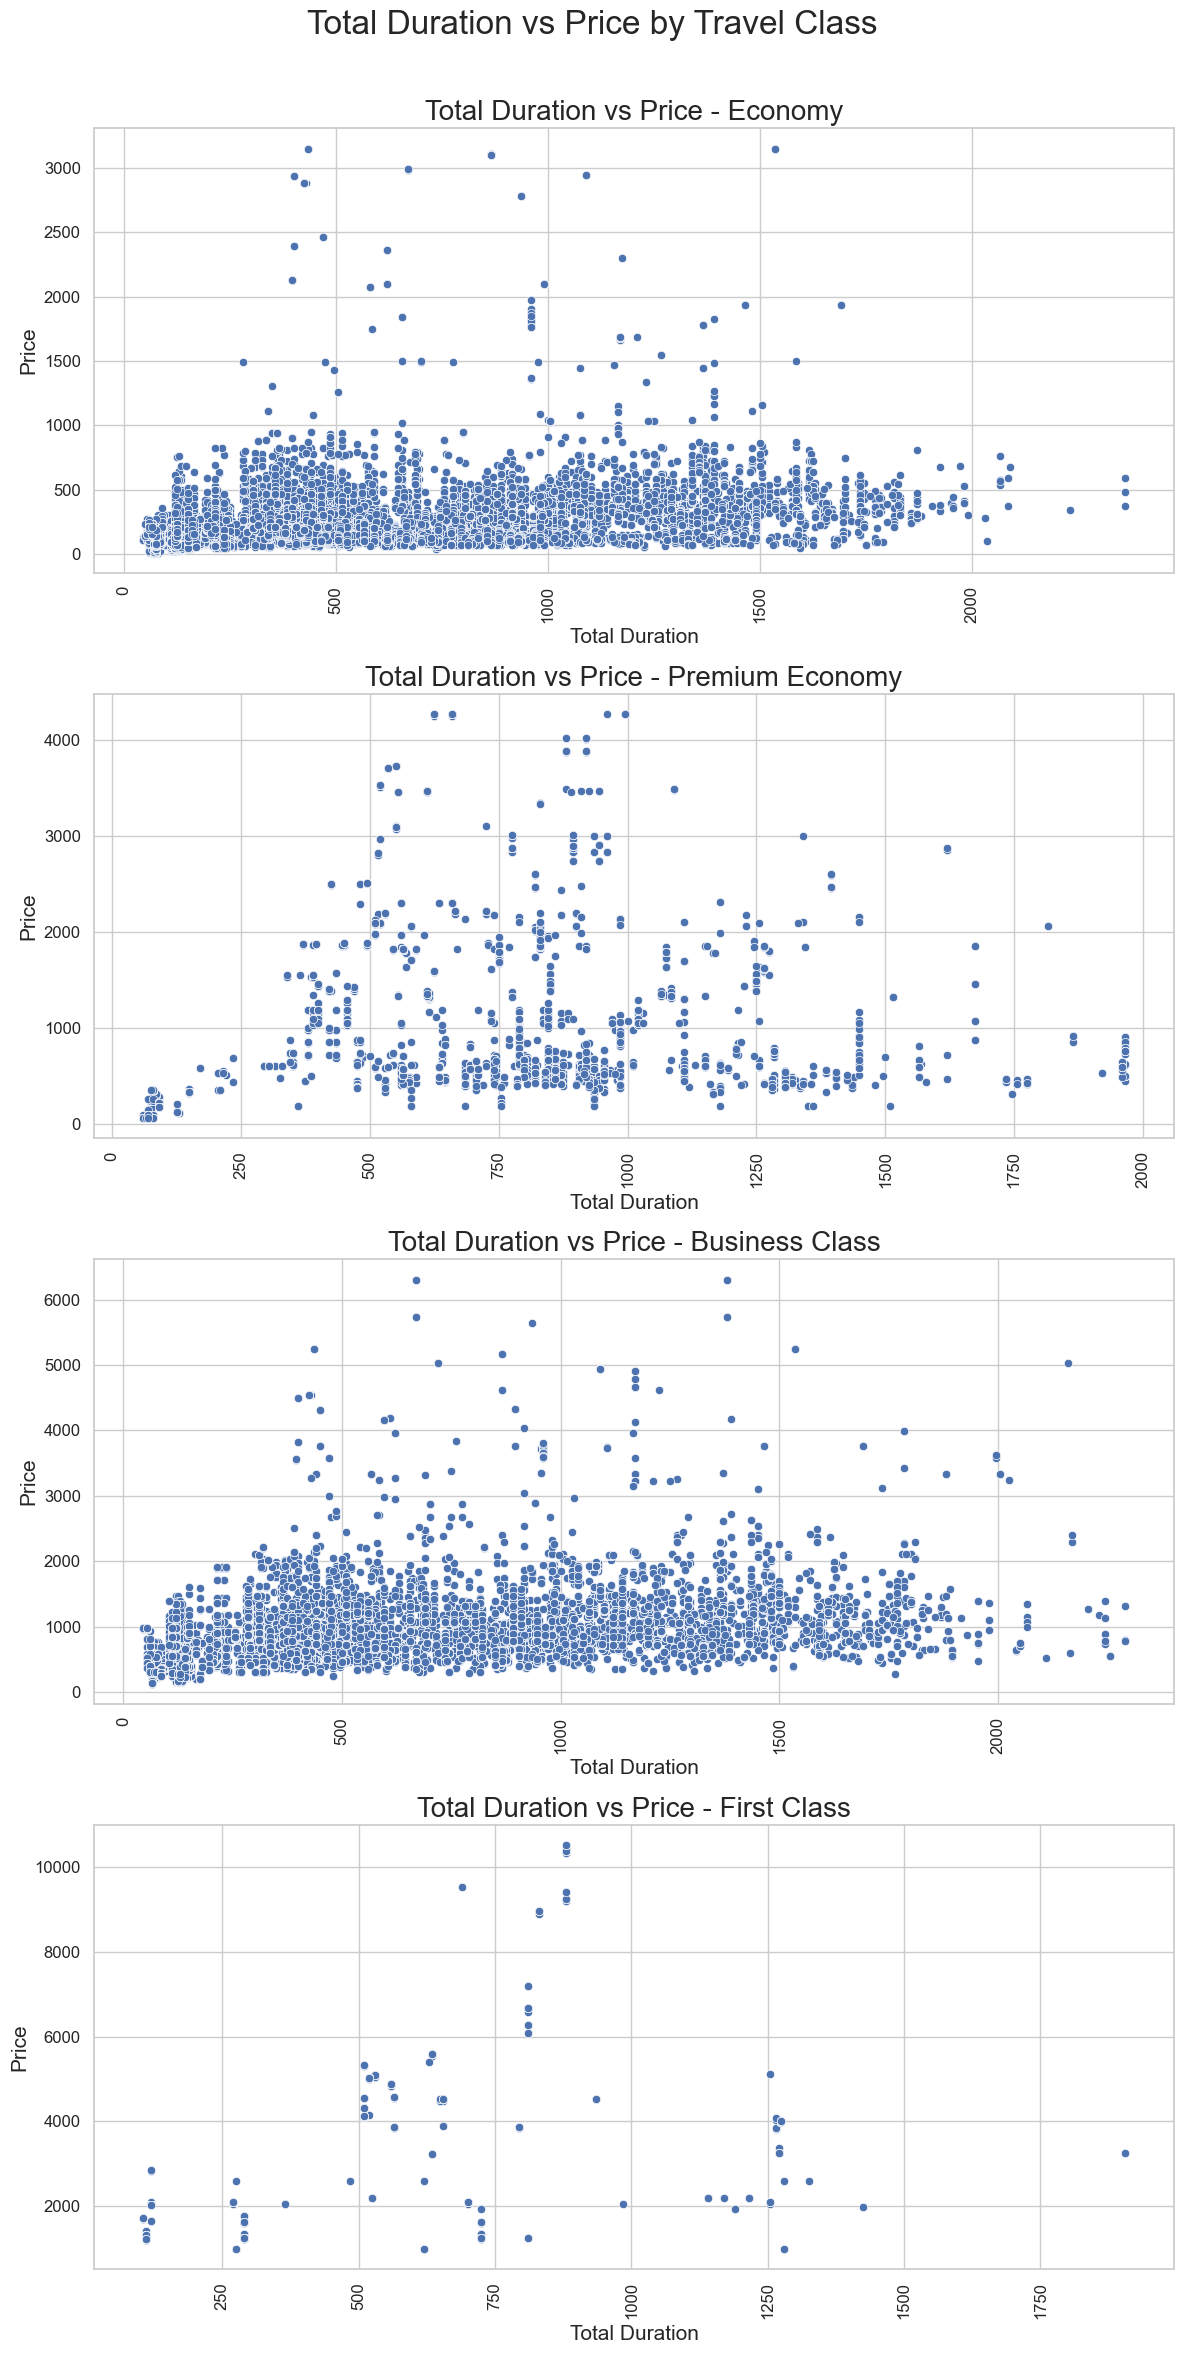

In [16]:
#Total Duration vs Price

# Load the dataset
file_path = 'final_flight_data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Define the travel classes
travel_classes = ['Economy', 'Premium Economy', 'Business Class', 'First Class']

# Create subplots for each travel class
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set the style for the plots
sns.set(style="whitegrid")

for i, travel_class in enumerate(travel_classes):
    # Filter the dataframe for the current travel class
    class_data = df[df['Travel Class'] == travel_class]
    
    # Create a scatter plot with logarithmic scale for the x-axis
    sns.scatterplot(x=class_data['Total Duration'], y=class_data['Price'], ax=axes[i], palette='Set2')
    
#     # Set a logarithmic scale on the x-axis to handle wide variation in duration
#     axes[i].set_xscale('log')
    
    # Customize the plot
    axes[i].set_title(f'Total Duration vs Price - {travel_class}', size=20)
    axes[i].set_xlabel('Total Duration', size=15)
    axes[i].set_ylabel('Price', size=15)
    axes[i].tick_params(axis='x', rotation=90, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

# Adjust layout to give more space between plots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a main title for all subplots
plt.suptitle('Total Duration vs Price by Travel Class', fontsize=24)

# Display the plot
plt.show()


/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/379307576.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Flight Type', y='Price', data=class_data, ax=axes[i], palette="Set2")
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/379307576.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Flight Type', y='Price', data=class_data, ax=axes[i], palette="Set2")
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_18942/379307576.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Flight Type', 

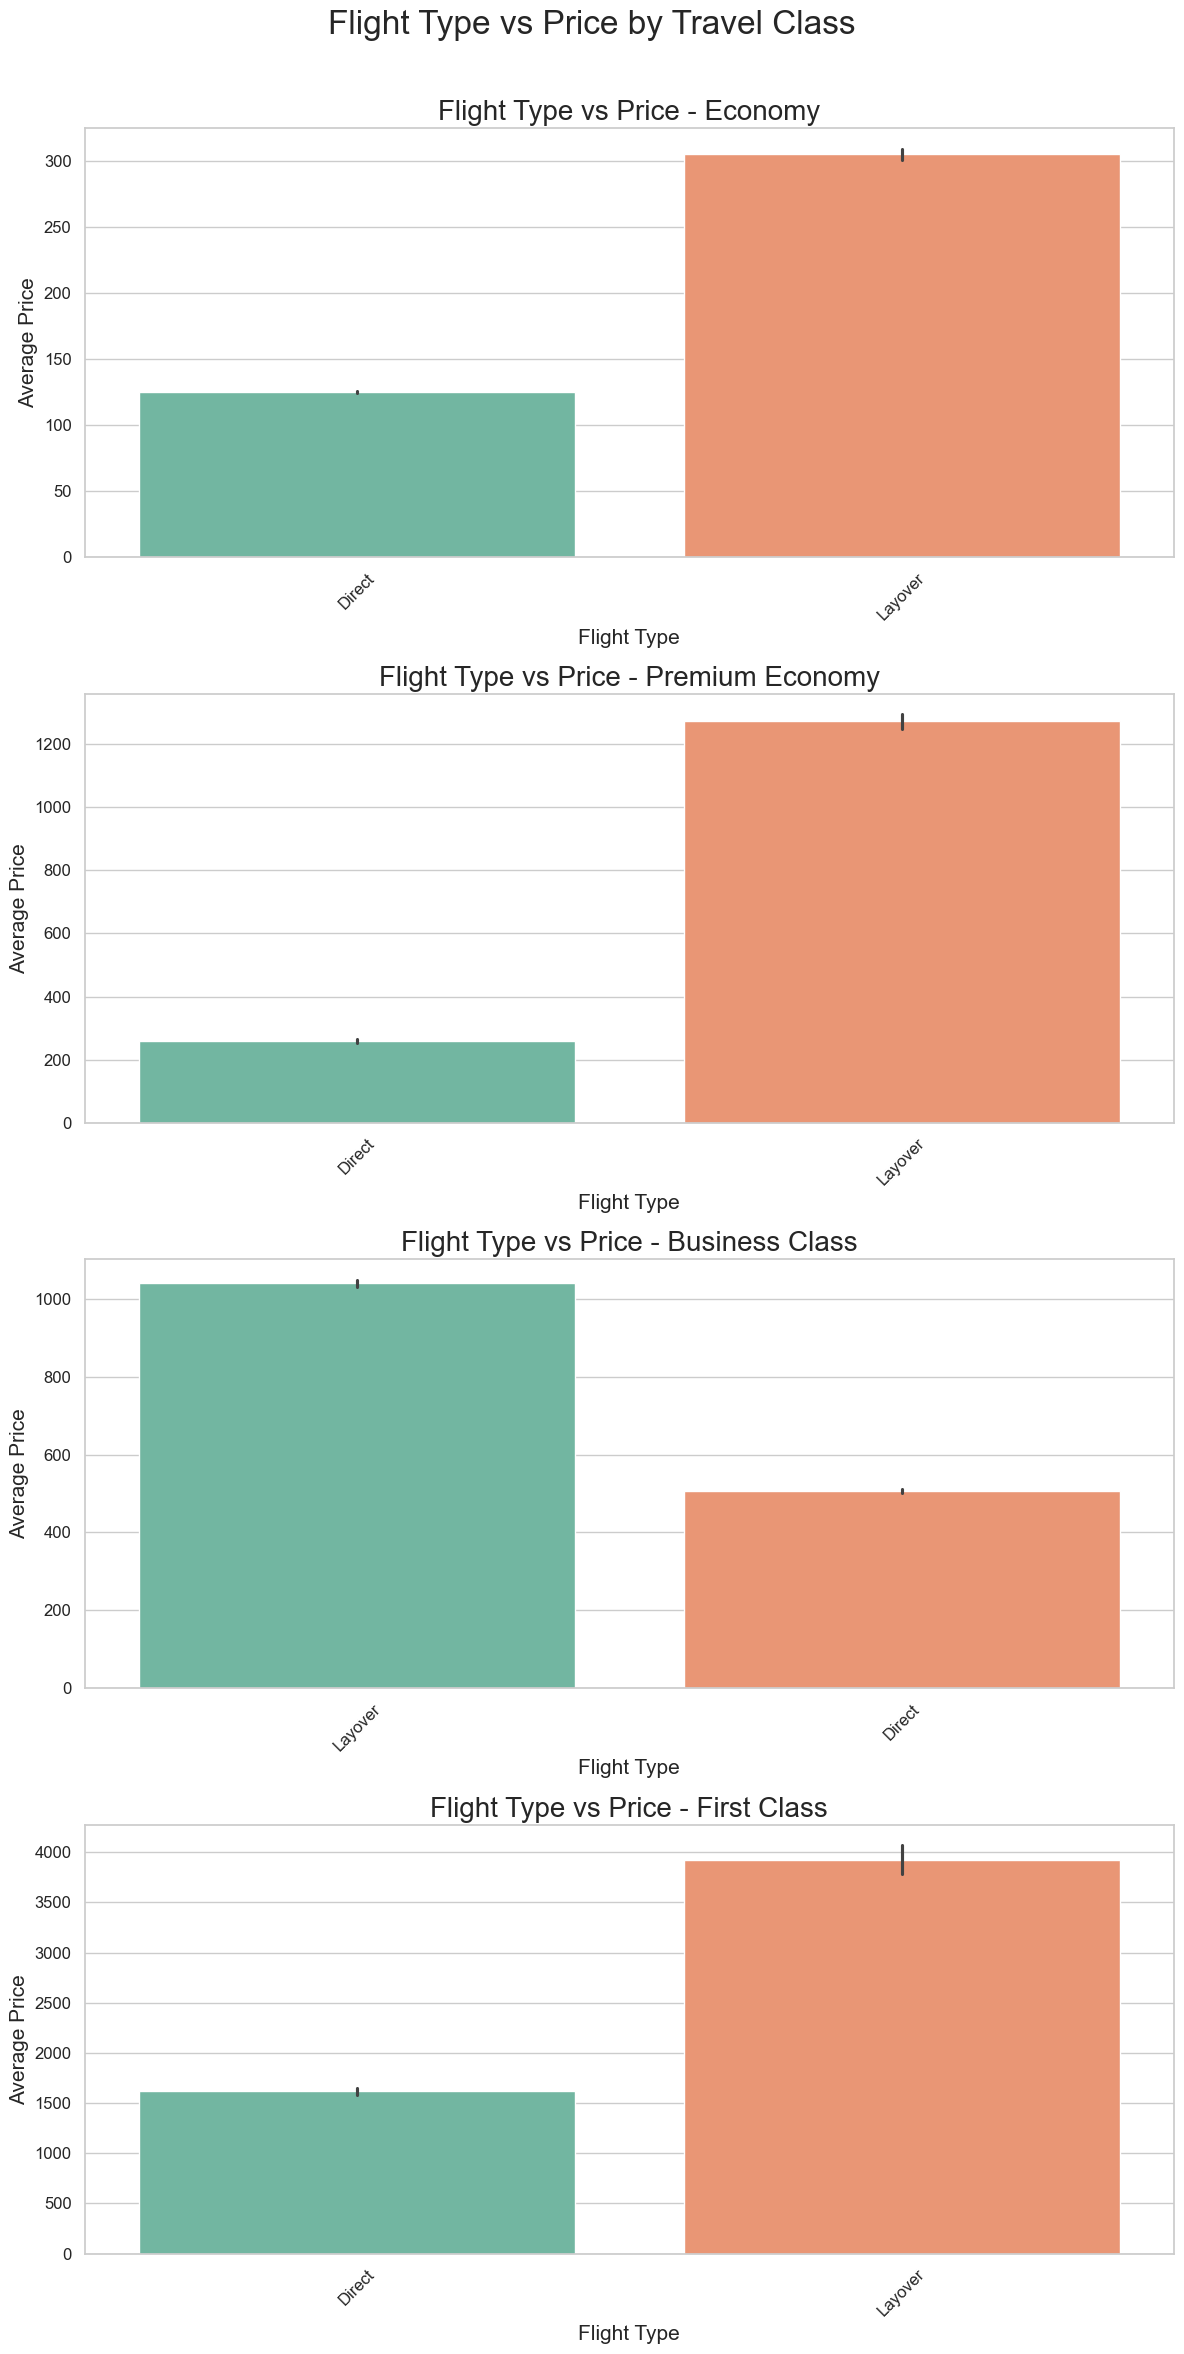

In [17]:
#Flight type(Direct or Layover) to price 

# Load the dataset
file_path = 'final_flight_data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Define the travel classes
travel_classes = ['Economy', 'Premium Economy', 'Business Class', 'First Class']

# Create subplots for each travel class
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set the style for the plots
sns.set(style="whitegrid")

for i, travel_class in enumerate(travel_classes):
    # Filter the dataframe for the current travel class
    class_data = df[df['Travel Class'] == travel_class]
    
    # Create a bar plot to compare Flight Type with Price
    sns.barplot(x='Flight Type', y='Price', data=class_data, ax=axes[i], palette="Set2")
    
    # Customize the plot
    axes[i].set_title(f'Flight Type vs Price - {travel_class}', size=20)
    axes[i].set_xlabel('Flight Type', size=15)
    axes[i].set_ylabel('Average Price', size=15)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

# Adjust layout to give more space between plots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a main title for all subplots
plt.suptitle('Flight Type vs Price by Travel Class', fontsize=24)

# Display the plot
plt.show()
